In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [107]:
data = pd.read_csv('data_without_outliers.csv')
data

,Unnamed: 0,InvoiceDate,StockCode,Description,Quantity,Price
0,0,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,1,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39
2,2,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,3,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,4,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...,...,...
487822,541889,2011-12-09 12:31:00,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,1.95
487823,541890,2011-12-09 12:49:00,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2.95
487824,541891,2011-12-09 12:49:00,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,1.25
487825,541892,2011-12-09 12:49:00,21217,RED RETROSPOT ROUND CAKE TINS,24,8.95


# 1. XYZ Analysis

In [161]:
# We will only look at data in one month - say, November - because for an industry 
# like retail monthly trends are more significant to track
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
df = data[(data['InvoiceDate'] < '2011-12-01') & (data['InvoiceDate'] > '2011-10-31 23:59:59')]
df

,Unnamed: 0,InvoiceDate,StockCode,Description,Quantity,Price
386417,431673,2011-11-01 08:16:00,21314,SMALL GLASS HEART TRINKET POT,8,2.10
386418,431674,2011-11-01 08:16:00,21704,BAG 250g SWIRLY MARBLES,12,0.85
386419,431675,2011-11-01 08:16:00,21791,VINTAGE HEADS AND TAILS CARD GAME,12,1.25
386420,431676,2011-11-01 08:16:00,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,1.25
386421,431677,2011-11-01 08:16:00,21915,RED HARMONICA IN BOX,12,1.25
...,...,...,...,...,...,...
464145,516379,2011-11-30 17:39:00,22197,POPCORN HOLDER,1,0.85
464146,516380,2011-11-30 17:39:00,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,1,3.29
464147,516381,2011-11-30 17:42:00,84946,ANTIQUE SILVER T-LIGHT GLASS,1,1.25
464148,516382,2011-11-30 17:42:00,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,7.95


In [163]:
df['Revenue'] = df['Quantity'] * df['Price']
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df

,Unnamed: 0,InvoiceDate,StockCode,Description,Quantity,Price,Revenue,Day
386417,431673,2011-11-01 08:16:00,21314,SMALL GLASS HEART TRINKET POT,8,2.10,16.80,1
386418,431674,2011-11-01 08:16:00,21704,BAG 250g SWIRLY MARBLES,12,0.85,10.20,1
386419,431675,2011-11-01 08:16:00,21791,VINTAGE HEADS AND TAILS CARD GAME,12,1.25,15.00,1
386420,431676,2011-11-01 08:16:00,21892,TRADITIONAL WOODEN CATCH CUP GAME,12,1.25,15.00,1
386421,431677,2011-11-01 08:16:00,21915,RED HARMONICA IN BOX,12,1.25,15.00,1
...,...,...,...,...,...,...,...,...
464145,516379,2011-11-30 17:39:00,22197,POPCORN HOLDER,1,0.85,0.85,30
464146,516380,2011-11-30 17:39:00,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,1,3.29,3.29,30
464147,516381,2011-11-30 17:42:00,84946,ANTIQUE SILVER T-LIGHT GLASS,1,1.25,1.25,30
464148,516382,2011-11-30 17:42:00,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,7.95,7.95,30


In [164]:
grouped_df = df.groupby(['StockCode','Day'])['Revenue'].sum().to_frame().reset_index()
grouped_df

,StockCode,Day,Revenue
0,10080,2,9.36
1,10080,11,9.36
2,10080,14,4.68
3,10080,18,1.56
4,10080,21,10.53
...,...,...,...
33582,C2,17,50.00
33583,C2,22,50.00
33584,C2,23,50.00
33585,C2,29,50.00


In [170]:
# Turn the table from long to wide
pivoted_df = grouped_df.pivot(index='StockCode', columns='Day', values='Revenue').reset_index().fillna(0)
pivoted_df

Day,StockCode,1,2,3,4,6,7,8,9,10,...,20,21,22,23,24,25,27,28,29,30
0,10080,0.0,9.36,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,10.53,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,10120,0.0,0.21,0.0,5.67,0.00,0.0,0.0,0.0,0.0,...,1.26,0.00,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.84
2,10124A,0.0,0.00,0.0,0.00,1.68,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,10124G,0.0,0.00,0.0,0.00,1.68,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,10125,0.0,0.00,0.0,1.70,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,90214N,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.50
2923,90214S,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2924,90214V,0.0,0.00,0.0,0.83,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2925,C2,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.00,0.00,50.00,50.0,0.0,0.0,0.0,0.0,50.0,0.00


In [171]:
# Check if there're any missing days
pivoted_df.columns

Index(['StockCode',           1,           2,           3,           4,
                 6,           7,           8,           9,          10,
                11,          13,          14,          15,          16,
                17,          18,          20,          21,          22,
                23,          24,          25,          27,          28,
                29,          30],
      dtype='object', name='Day')

In [172]:
# Add columns with missing days
pivoted_df['5'] = 0.0
pivoted_df['12'] = 0.0
pivoted_df['19'] = 0.0
pivoted_df['26'] = 0.0
pivoted_df

Day,StockCode,1,2,3,4,6,7,8,9,10,...,24,25,27,28,29,30,5,12,19,26
0,10080,0.0,9.36,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,10120,0.0,0.21,0.0,5.67,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.84,0.0,0.0,0.0,0.0
2,10124A,0.0,0.00,0.0,0.00,1.68,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,10124G,0.0,0.00,0.0,0.00,1.68,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,10125,0.0,0.00,0.0,1.70,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,90214N,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.50,0.0,0.0,0.0,0.0
2923,90214S,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2924,90214V,0.0,0.00,0.0,0.83,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2925,C2,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50.0,0.00,0.0,0.0,0.0,0.0


In [173]:
# Calculate total sales
pivoted_df['Total_sales'] = pivoted_df.iloc[:, 1:31].sum(axis=1,numeric_only=True)
# Calculate average monthly sales
pivoted_df['Average_sales'] = pivoted_df.iloc[:, 1:31].mean(axis=1)
# Calculate standard deviation
pivoted_df['Std_sales'] = pivoted_df.iloc[:, 1:31].std(axis=1)
pivoted_df

Day,StockCode,1,2,3,4,6,7,8,9,10,...,28,29,30,5,12,19,26,Total_sales,Average_sales,Std_sales
0,10080,0.0,9.36,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,35.49,1.183000,3.042523
1,10120,0.0,0.21,0.0,5.67,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.84,0.0,0.0,0.0,0.0,8.19,0.273000,1.055273
2,10124A,0.0,0.00,0.0,0.00,1.68,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.68,0.056000,0.306725
3,10124G,0.0,0.00,0.0,0.00,1.68,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.68,0.056000,0.306725
4,10125,0.0,0.00,0.0,1.70,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.70,0.056667,0.310376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,90214N,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,2.50,0.0,0.0,0.0,0.0,2.50,0.083333,0.456435
2923,90214S,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,15.00,0.500000,2.738613
2924,90214V,0.0,0.00,0.0,0.83,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.83,0.027667,0.151537
2925,C2,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,50.0,0.00,0.0,0.0,0.0,0.0,200.00,6.666667,17.287295


In [176]:
# Compute Coefficient of demand variation (CoV)
pivoted_df['CoV'] = pivoted_df['Std_sales'] / pivoted_df['Average_sales']

<AxesSubplot:>

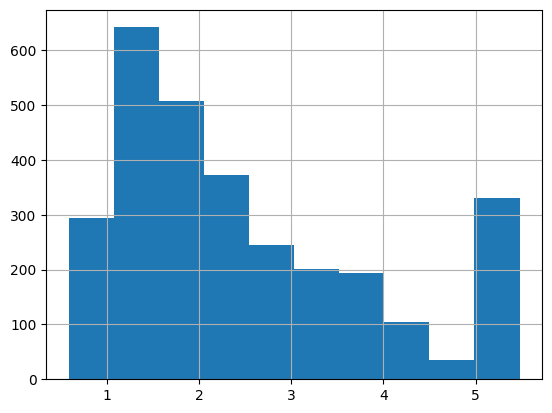

In [177]:
# Plot histogram to define CoV thresholds for each XYZ class
pivoted_df['CoV'].hist()

In [184]:
def condition_xyz(x):
    if x <= 1.1:
        return "X"
    elif x > 1.1 and x <= 2.5:
        return "Y"
    else:
        return 'Z'

pivoted_df['XYZ'] = pivoted_df['CoV'].apply(condition_xyz)
pivoted_df.head(10)

Day,StockCode,1,2,3,4,6,7,8,9,10,...,30,5,12,19,26,Total_sales,Average_sales,Std_sales,CoV,XYZ
0,10080,0.00,9.36,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,35.49,1.183000,3.042523,2.571871,Z
1,10120,0.00,0.21,0.00,5.67,0.00,0.0,0.00,0.00,0.00,...,0.84,0.0,0.0,0.0,0.0,8.19,0.273000,1.055273,3.865469,Z
2,10124A,0.00,0.00,0.00,0.00,1.68,0.0,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,1.68,0.056000,0.306725,5.477226,Z
3,10124G,0.00,0.00,0.00,0.00,1.68,0.0,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,1.68,0.056000,0.306725,5.477226,Z
4,10125,0.00,0.00,0.00,1.70,0.00,0.0,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,1.70,0.056667,0.310376,5.477226,Z
5,10135,0.00,2.46,1.25,9.00,5.00,0.0,25.00,0.00,19.88,...,0.00,0.0,0.0,0.0,0.0,212.52,7.084000,12.529948,1.768767,Y
6,11001,0.00,27.04,0.00,0.00,0.00,0.0,0.00,55.77,0.00,...,0.00,0.0,0.0,0.0,0.0,184.73,6.157667,12.554043,2.038766,Y
7,15030,0.00,0.00,0.00,0.00,0.00,0.0,0.00,3.48,2.90,...,0.00,0.0,0.0,0.0,0.0,6.38,0.212667,0.812904,3.822434,Z
8,15034,8.40,3.36,0.83,3.36,0.00,0.0,1.66,2.51,0.00,...,2.49,0.0,0.0,0.0,0.0,50.94,1.698000,2.309256,1.359986,Y
9,15036,29.88,24.81,4.89,3.26,0.00,0.0,14.67,39.84,9.96,...,3.26,0.0,0.0,0.0,0.0,533.32,17.777333,24.949733,1.403458,Y


In [370]:
pivoted_df['XYZ'].value_counts()

Y    1475
Z    1133
X     319
Name: XYZ, dtype: int64

# 2. ABC Analysis

In [186]:
pivoted_df = pivoted_df.sort_values(by='Total_sales', ascending=False).reset_index()

In [369]:
pivoted_df['Rev_cumsum'] = pivoted_df['Total_sales'].cumsum()
pivoted_df['Rev_all'] = pivoted_df['Total_sales'].sum()
pivoted_df['Rev_cum_percent'] = 100 * pivoted_df['Rev_cumsum'] / pivoted_df['Rev_all']

def condition_abc(x):
    if x > 0 and x <= 60:
        return 'A'
    elif x > 60 and x <= 90:
        return 'B'
    else:
        return 'C'

pivoted_df['ABC'] = pivoted_df['Rev_cum_percent'].apply(condition_abc)
pivoted_df['SKU_percent'] = (100 * pd.Series(range(1, len(pivoted_df)+1)) / len(pivoted_df))
pivoted_df['Rev_percent'] = (100 * pivoted_df['Total_sales'] / pivoted_df['Rev_all'])
pivoted_df

Day,index,StockCode,1,2,3,4,6,7,8,9,...,Std_sales,CoV,XYZ,Rev_cumsum,Rev_all,Rev_percent,ABC,SKU_percent,Rev__cum_percent,Rev_cum_percent
0,759,22086,190.50,711.38,167.71,590.68,258.35,179.95,569.68,663.99,...,354.644415,0.691266,X,15391.09,1094382.2,1.406372,A,0.034165,1.406372,1.406372
1,1608,23084,145.60,513.00,597.84,371.25,352.80,449.18,708.04,313.43,...,326.302737,0.653323,X,30374.61,1094382.2,1.369130,A,0.068329,2.775503,2.775503
2,1034,22423,173.10,87.63,1005.15,1453.20,191.25,388.65,200.04,215.67,...,356.370646,0.902819,X,42216.54,1094382.2,1.082065,A,0.102494,3.857568,3.857568
3,785,22114,25.50,68.00,67.79,460.43,119.75,759.15,410.91,233.03,...,321.505733,0.922176,X,52675.68,1094382.2,0.955712,A,0.136659,4.813280,4.813280
4,1861,23355,159.00,427.79,128.70,103.95,308.10,1190.60,453.72,351.45,...,262.088106,0.765473,X,62947.30,1094382.2,0.938577,A,0.170823,5.751857,5.751857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2266,71496A,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.096764,5.477226,Z,1094380.72,1094382.2,0.000048,C,99.863341,99.999865,99.999865
2923,2267,71496B,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.096764,5.477226,Z,1094381.25,1094382.2,0.000048,C,99.897506,99.999913,99.999913
2924,2145,35818B,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.069378,5.477226,Z,1094381.63,1094382.2,0.000035,C,99.931671,99.999948,99.999948
2925,2318,79063C,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.048205,3.805622,Z,1094382.01,1094382.2,0.000035,C,99.965835,99.999983,99.999983


In [366]:
pivoted_df['ABC'].value_counts()

C    1875
B     755
A     297
Name: ABC, dtype: int64

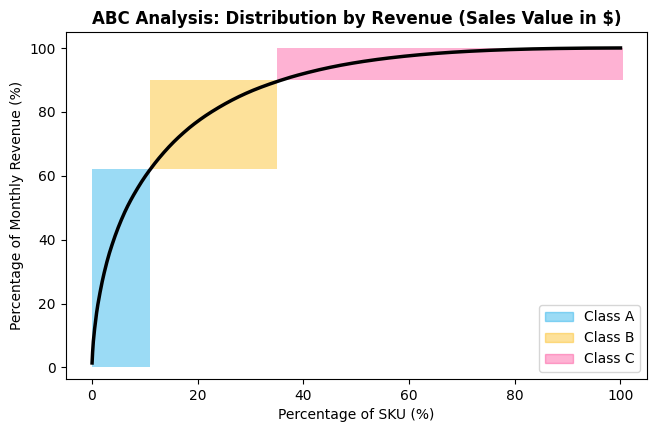

In [364]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle

# Distribution by Value
ax = plt.gca()
pivoted_df.plot(figsize=(7.5, 4.5), x='SKU_percent', y='Rev_cum_percent', ax=ax, color='black', linewidth=2.5, legend=False)
# Helpful lines for standard ABC thresholds
# 20%, 50% 
#ax.axvline(5 , color='lightgray', linestyle='--', linewidth = 2.0)
#ax.axvline(20 , color='lightgray', linestyle='--', linewidth = 2.0)
# 20%, 50% 
#ax.axhline(80 , color='lightgray', linestyle='--', linewidth = 2.0)
#ax.axhline(95 , color='lightgray', linestyle='--', linewidth = 2.0)
# Fill the areas
ax.add_patch(Rectangle((0, 0), 11, 62, facecolor='#07a5e8', fill=True, alpha=0.4))     # A
ax.add_patch(Rectangle((11, 62), 24, 28, facecolor='#fcb603', fill=True, alpha=0.4))   # B
ax.add_patch(Rectangle((35, 90), 65.5, 10, facecolor='#fc036f', fill=True, alpha=0.3)) # C
# Create legend
patchA = mpatches.Patch(color='#07a5e8', label='Class A', alpha=0.4)
patchB = mpatches.Patch(color='#fcb603', label='Class B', alpha=0.4)
patchC = mpatches.Patch(color='#fc036f', label='Class C', alpha=0.3)
plt.legend(handles=[patchA, patchB, patchC])
plt.xlabel('Percentage of SKU (%)')
plt.ylabel('Percentage of Monthly Revenue (%)')
plt.title('ABC Analysis: Distribution by Revenue (Sales Value in $)', weight='semibold')
plt.show()

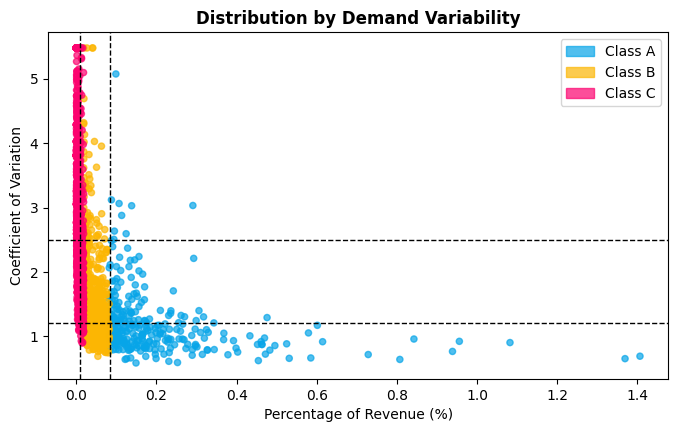

In [365]:
n_sku = len(pivoted_df)
n_a, n_b = int(0.1 * n_sku), int(0.48 * n_sku) 
pivoted_df['SKU_ID'] = pd.Series(range(1, len(pivoted_df))).astype(int)
# A, B, C on turnover
to_a, to_b = pivoted_df[pivoted_df['SKU_ID']==n_a]['Rev_percent'].max(), pivoted_df[pivoted_df['SKU_ID']==n_b]['Rev_percent'].max()

ax = plt.gca()
colors = {'A':'#07a5e8', 'B':'#fcb603', 'C':'#fc036f'}
#df_plot = df_abc[df_abc['CV']<4].copy() # Remove Outliers
pivoted_df.plot.scatter(figsize=(8, 4.5), x='Rev_percent', y='CoV', color=pivoted_df['ABC'].map(colors), ax=ax, alpha=0.7)
# A, B, C
ax.axvline(to_a , color='black', linestyle='--', linewidth = 1.0)
ax.axvline(to_b , color='black', linestyle='--', linewidth = 1.0)
# X, Y, Z 
ax.axhline(1.2, color='black', linestyle='--', linewidth = 1.0)
ax.axhline(2.5, color='black', linestyle='--', linewidth = 1.0)
# Create legend
patchA = mpatches.Patch(color='#07a5e8', label='Class A', alpha=0.7)
patchB = mpatches.Patch(color='#fcb603', label='Class B', alpha=0.7)
patchC = mpatches.Patch(color='#fc036f', label='Class C', alpha=0.7)
plt.legend(handles=[patchA, patchB, patchC])
plt.xlabel('Percentage of Revenue (%)')
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability', weight='semibold')
plt.show()